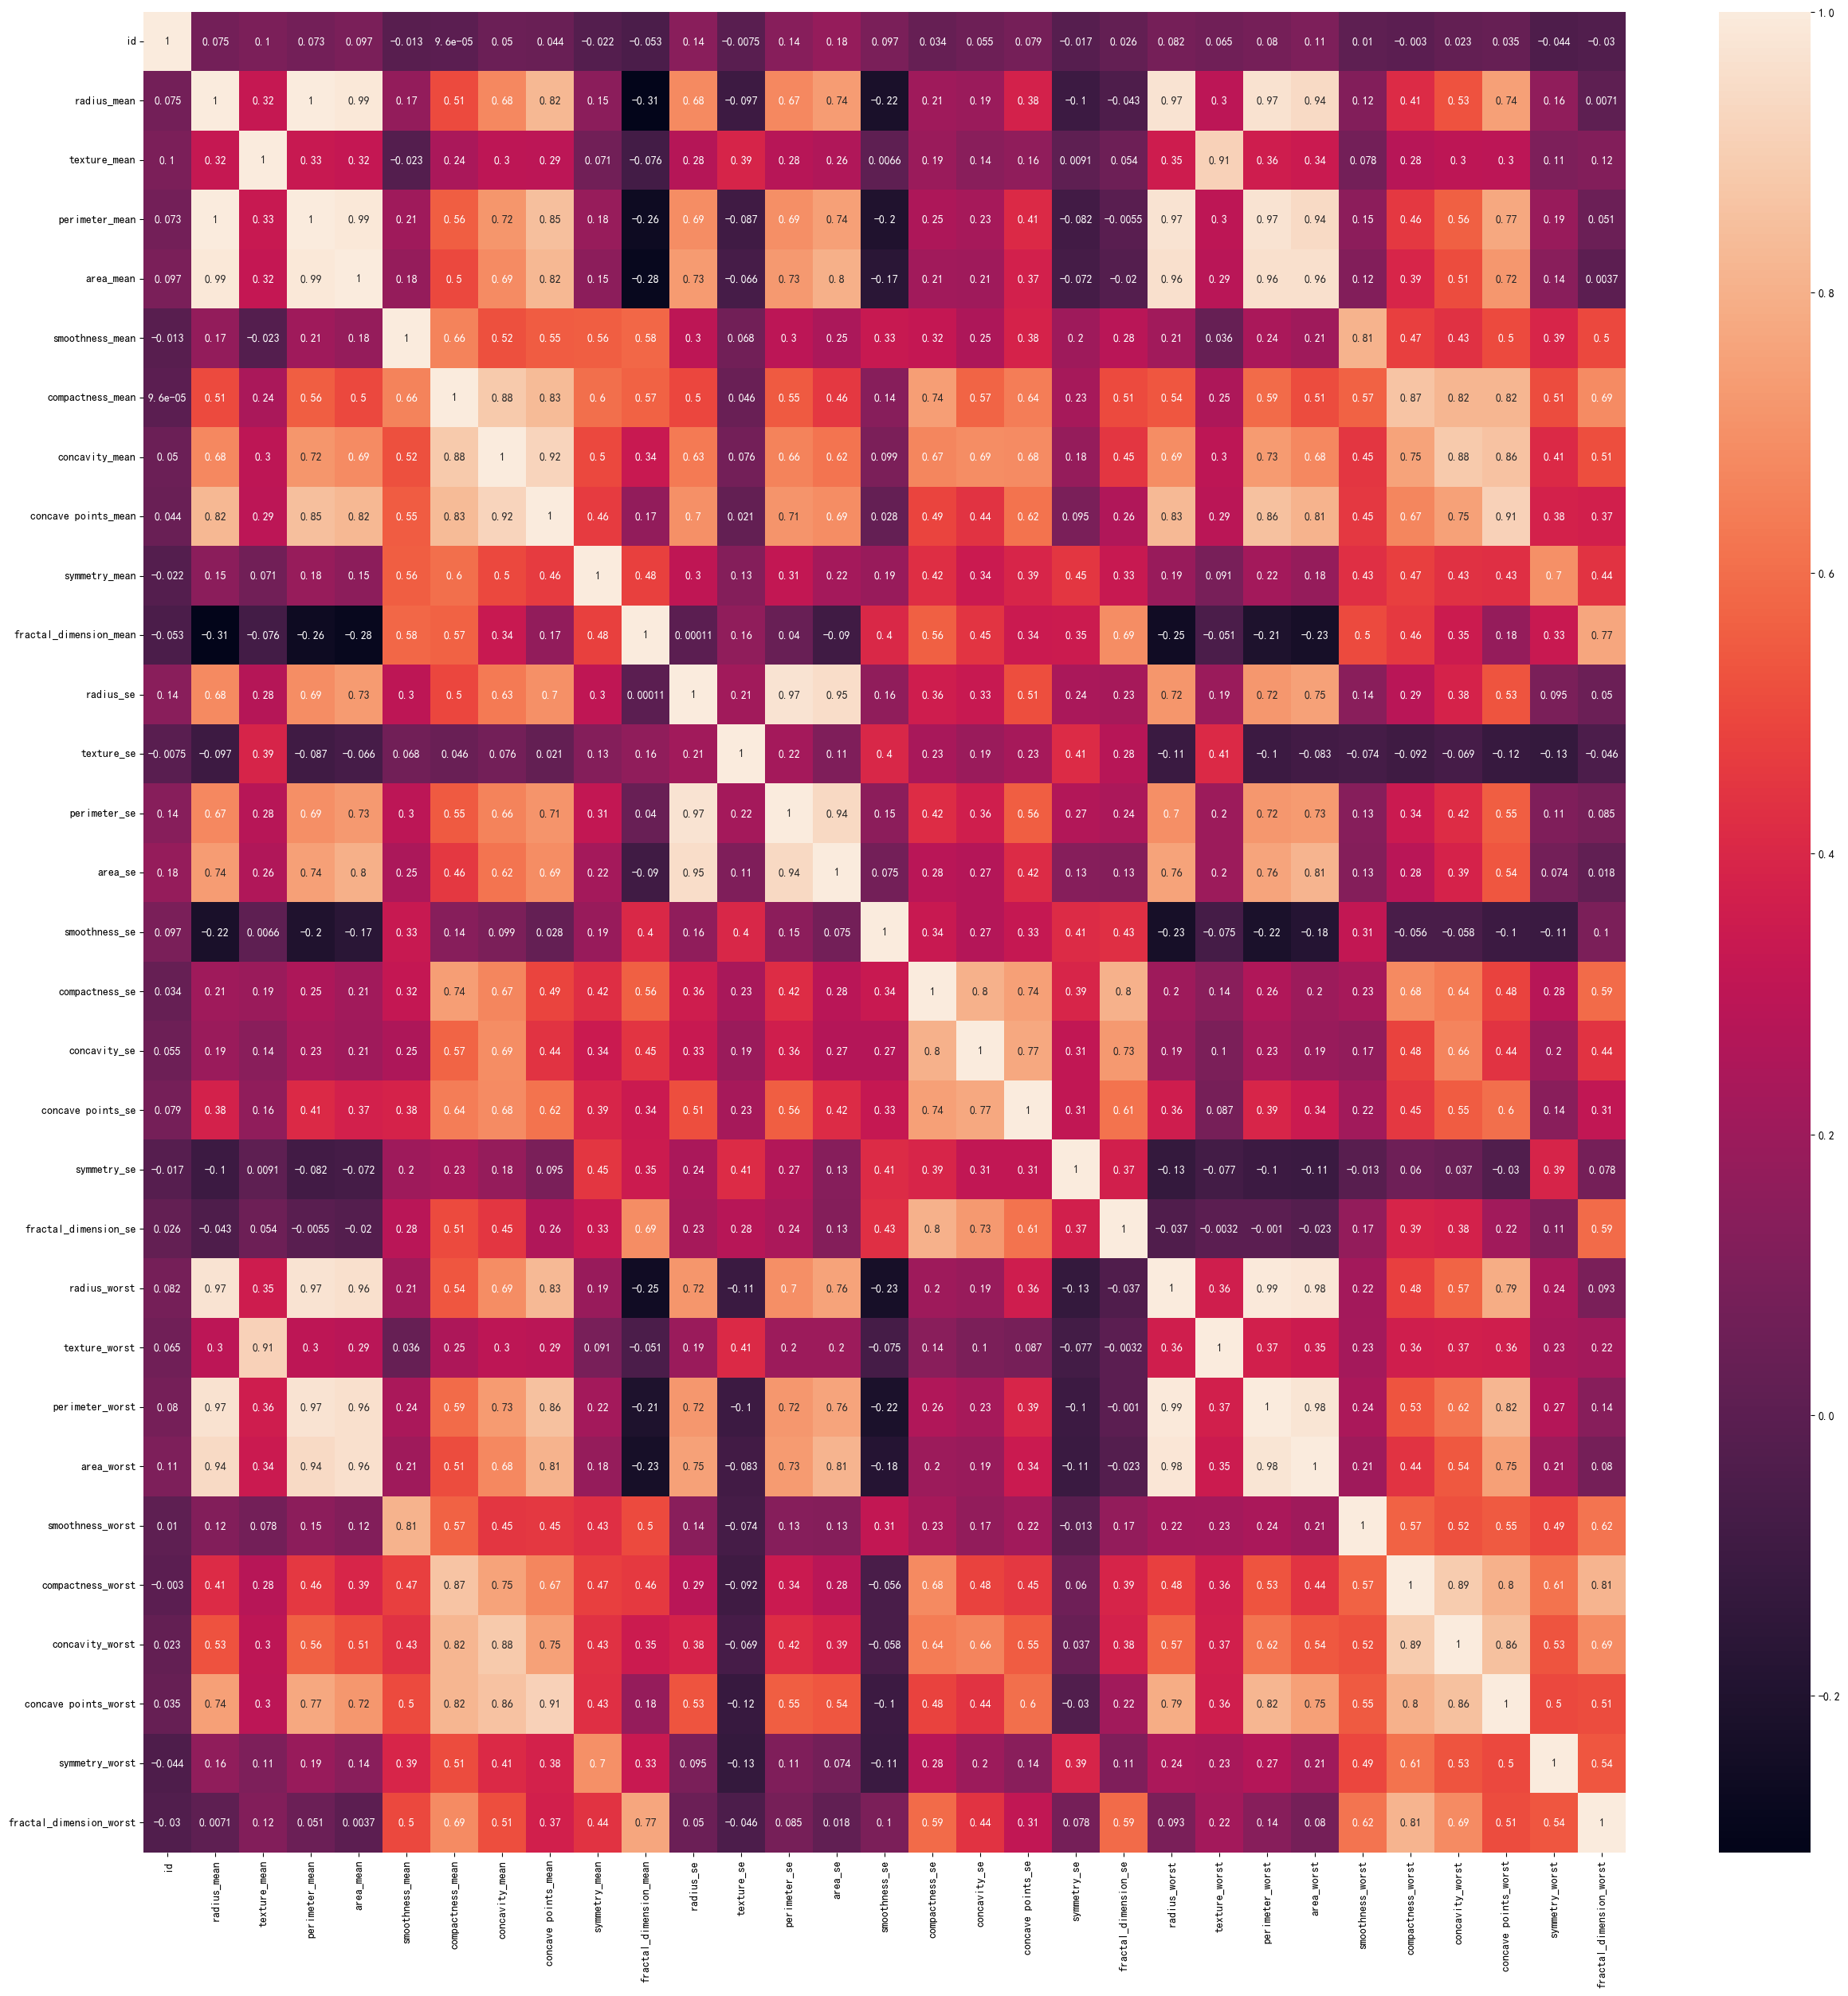

In [67]:
from sklearn.svm import SVC
import pickle
import seaborn as sn
import matplotlib.pyplot as plt

with open("./resource.h5", "rb") as f:
    datasets = pickle.load(f)
    
cancer_df = datasets["cancer"]
corr = cancer_df.corr()
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

plt.figure(figsize=(30, 30))

sn.heatmap(corr, annot=True)
plt.show()

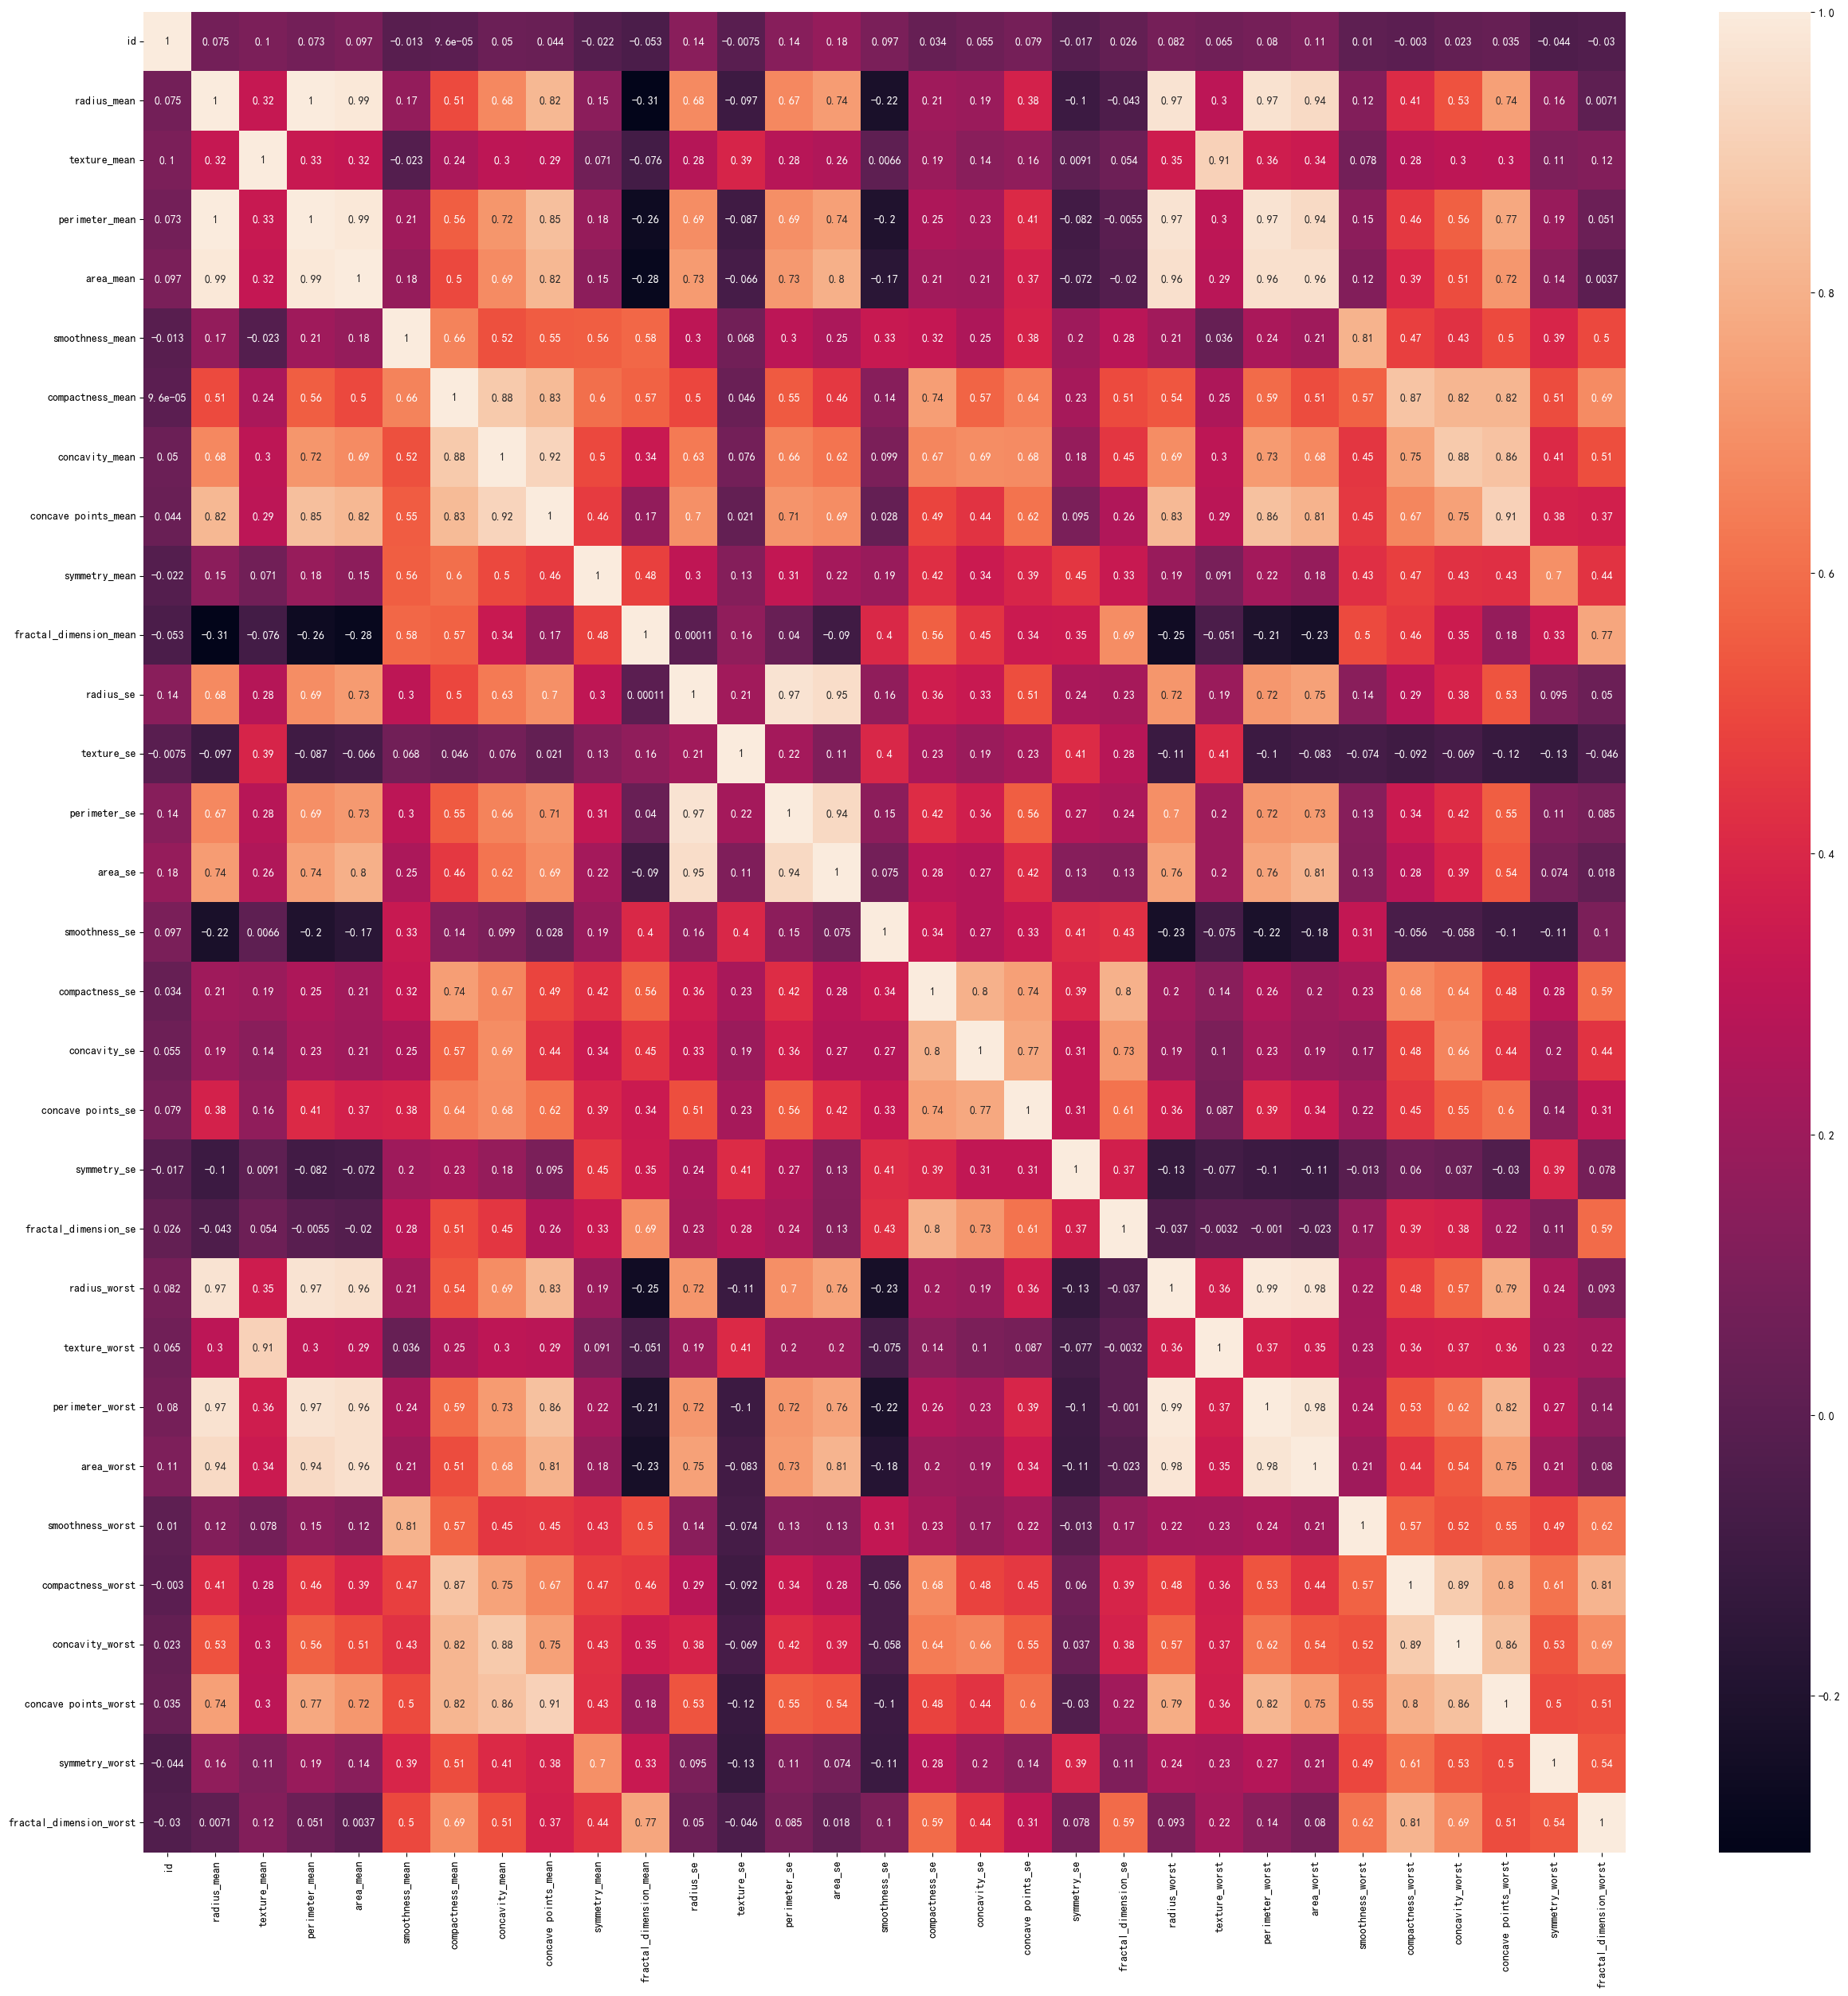

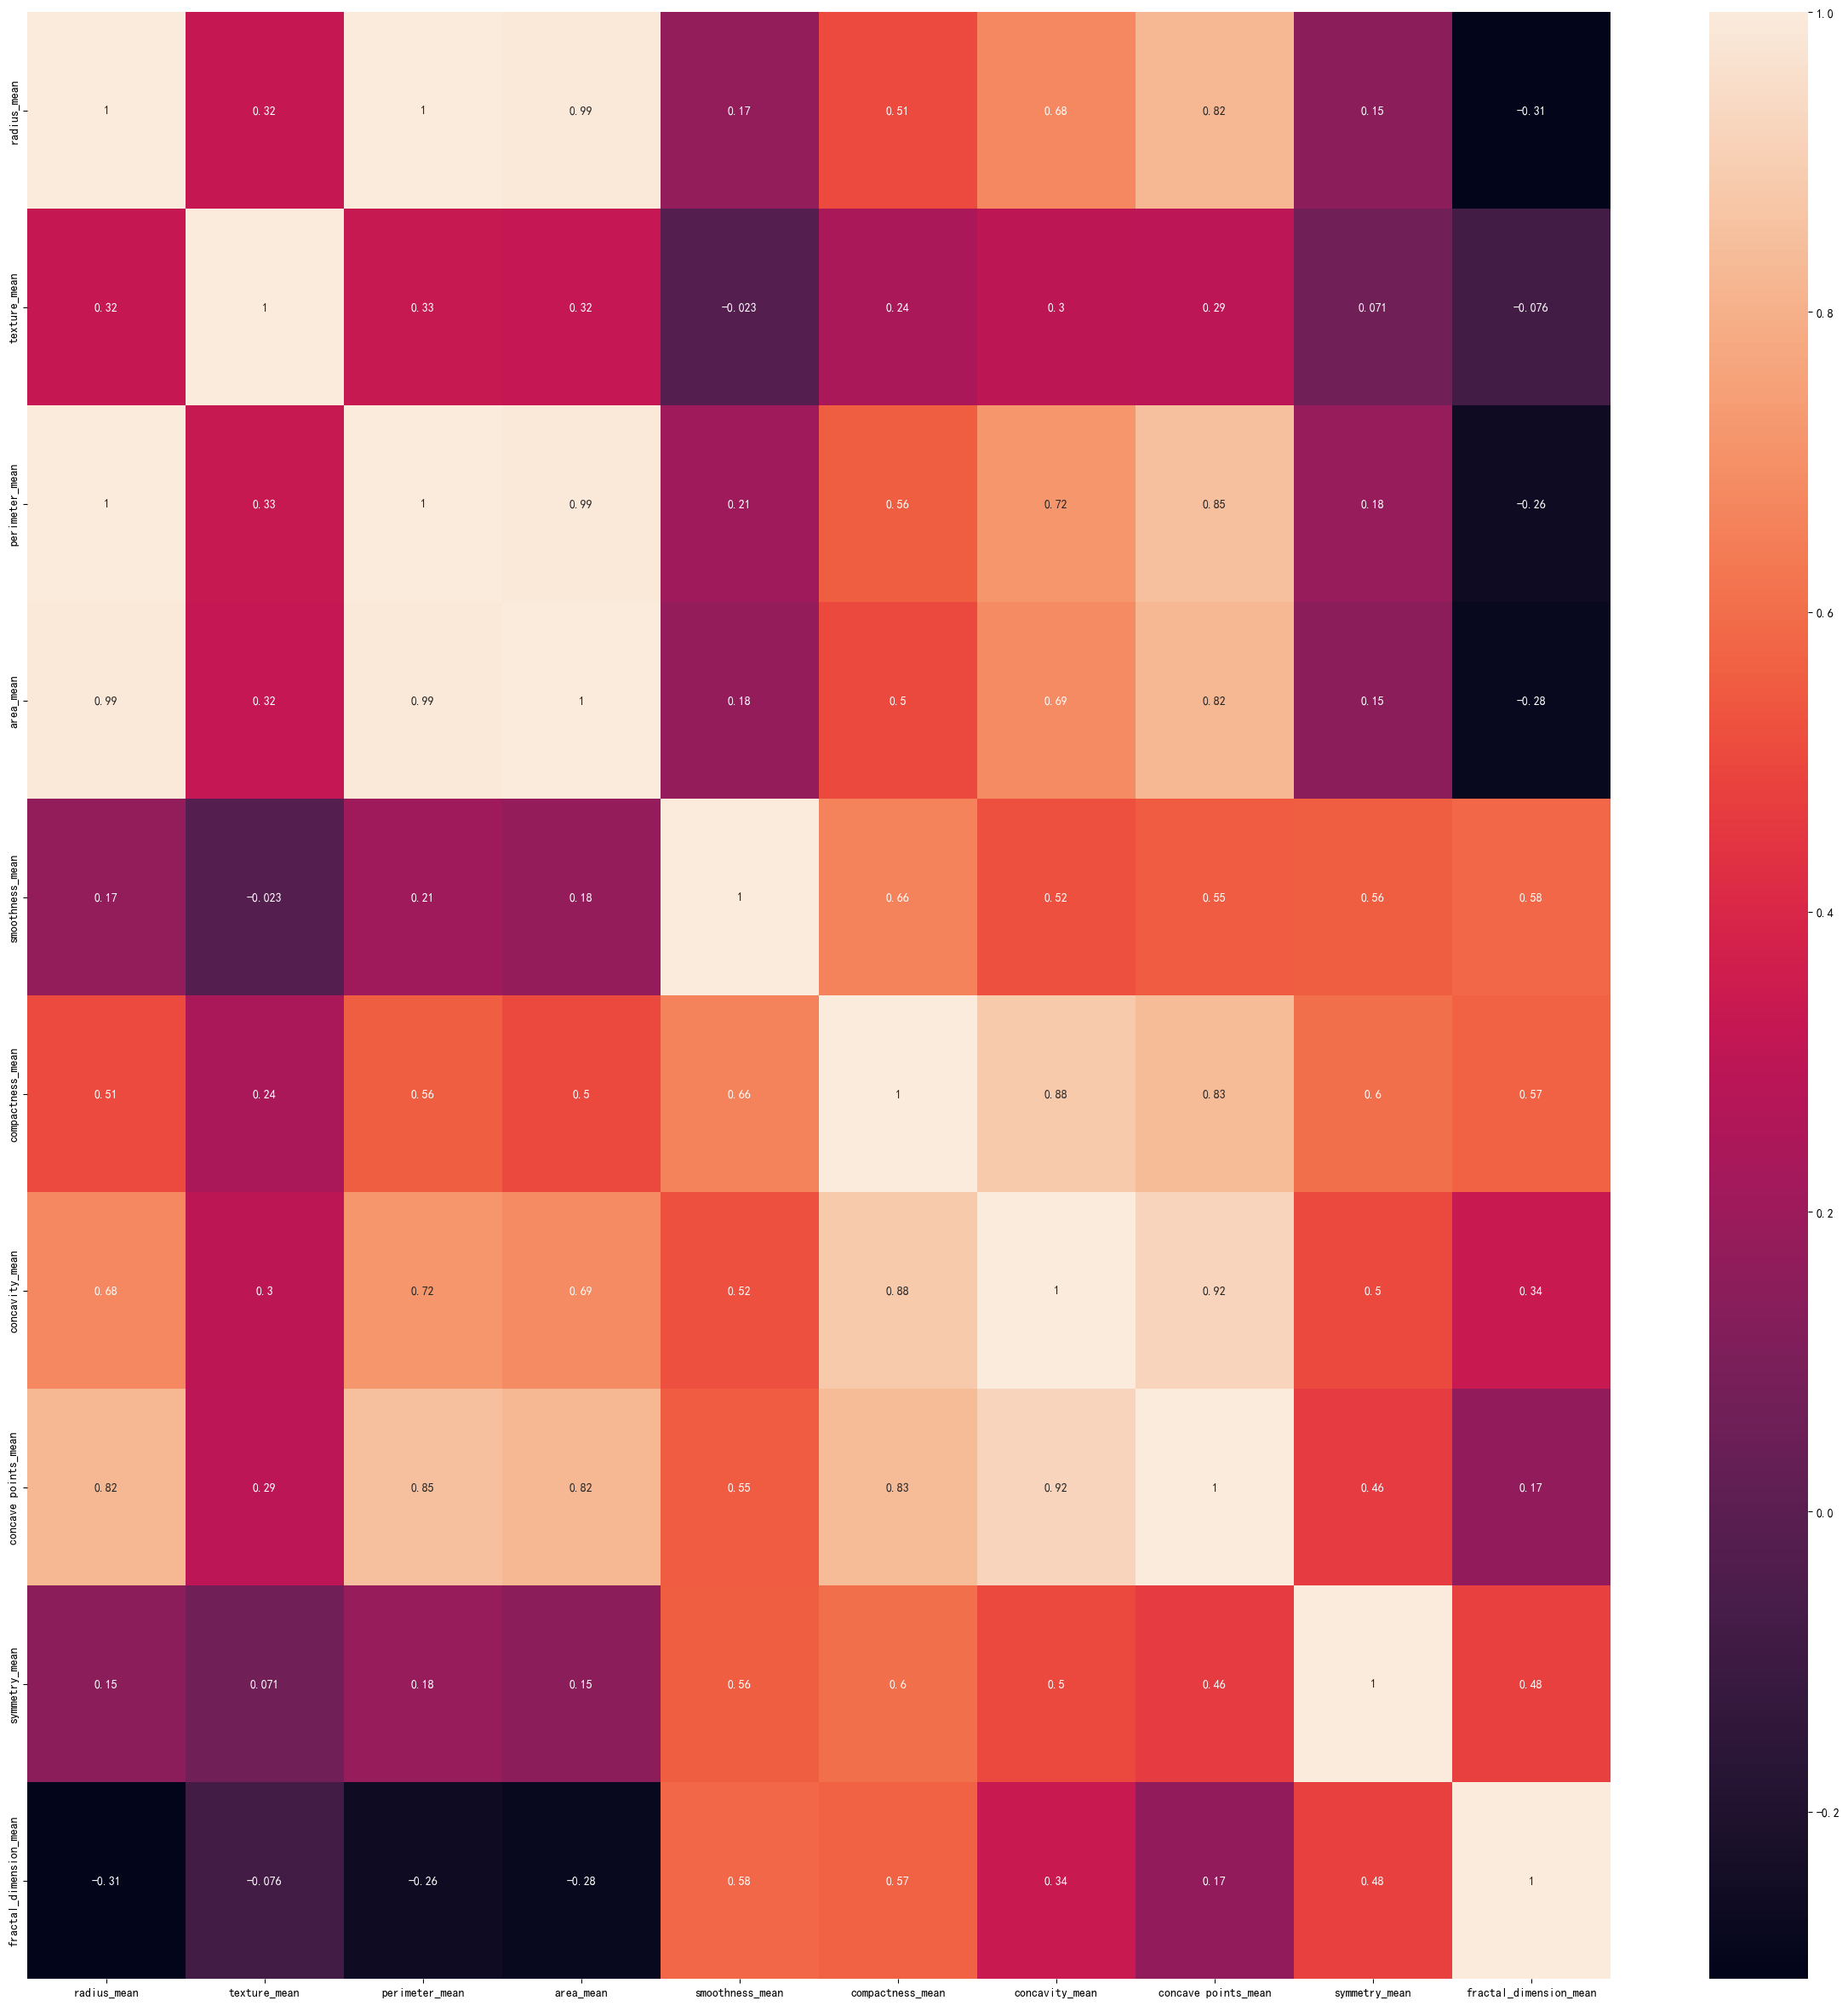

In [42]:
data = cancer_df.iloc[:, :12]
y = data["diagnosis"].map({"M":0, "B":1})
X = data.drop(["diagnosis", "id"], axis=1)
plt.figure(figsize=(30, 30))

sn.heatmap(X.corr(), annot=True)
plt.show()

In [46]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

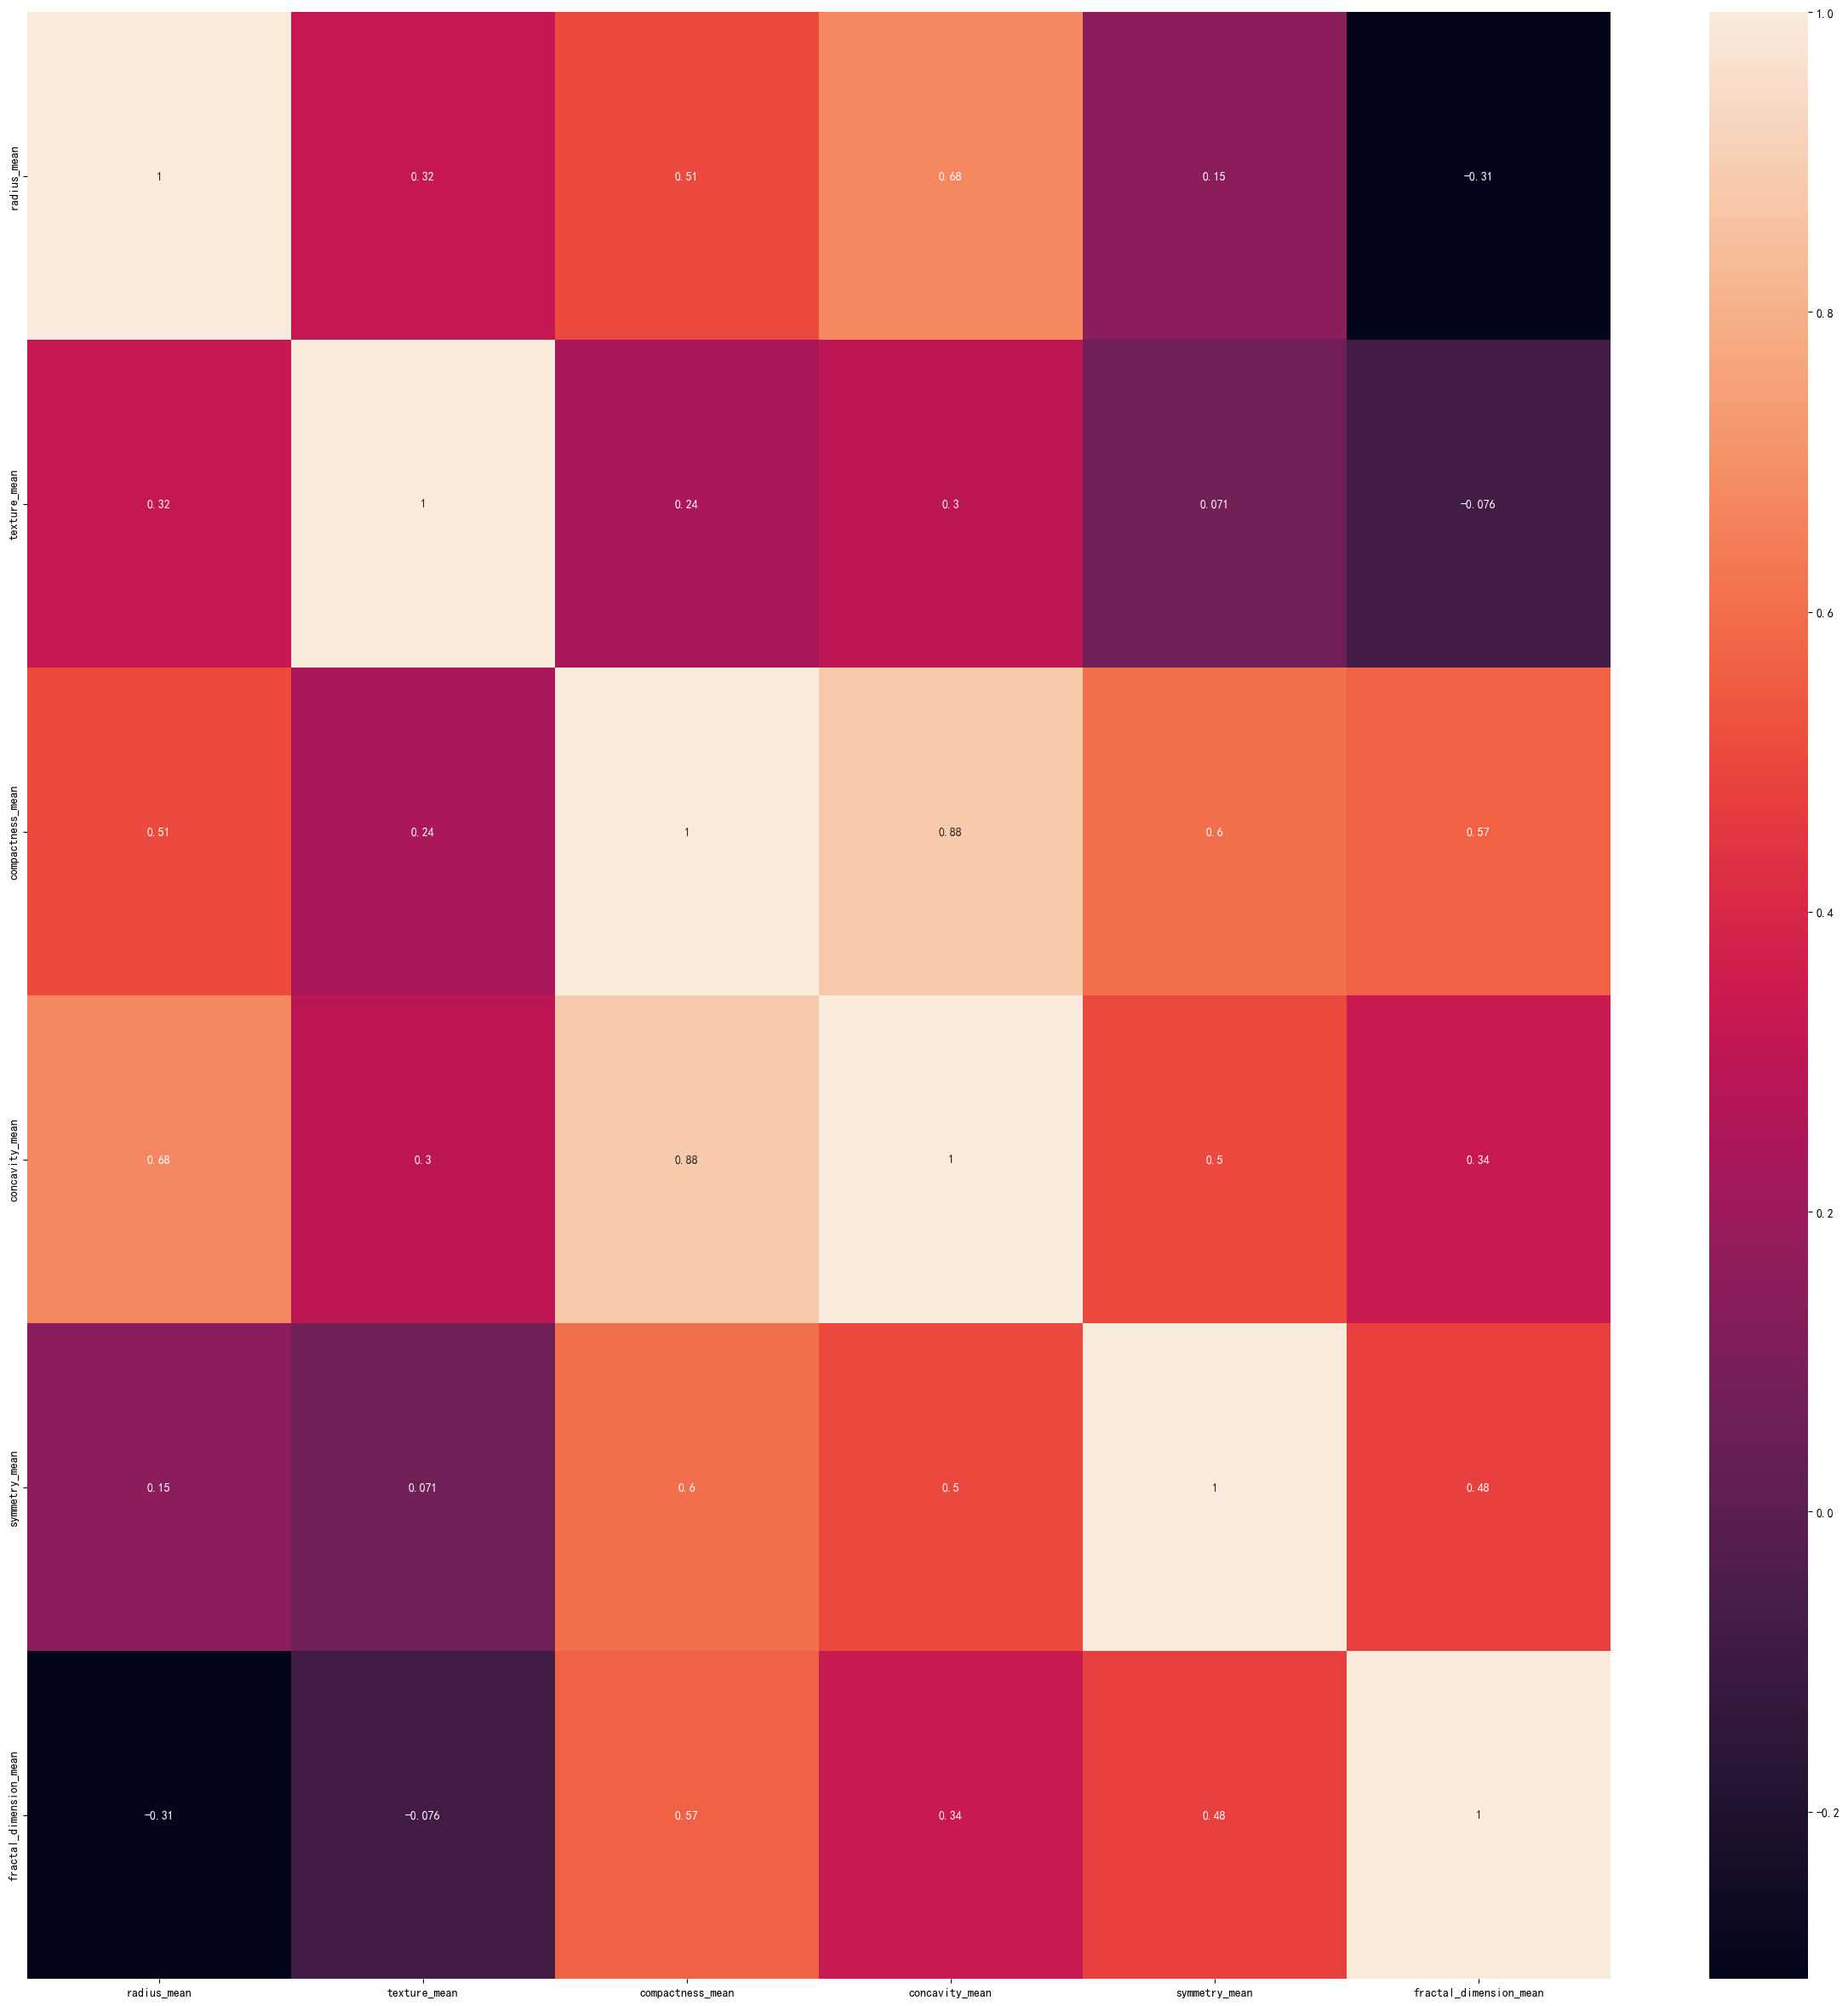

In [47]:
X1 = X.drop(["smoothness_mean", "concave points_mean", "area_mean", "perimeter_mean"], axis=1)
plt.figure(figsize=(30, 30))

sn.heatmap(X1.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
svc1 = SVC()
cross_val_score(svc1, X, y, cv=5).mean()

In [57]:
svc3 = SVC()
cross_val_score(svc3, data.drop(["diagnosis"], axis=1), y)

array([0.60526316, 0.55263158, 0.63157895, 0.61403509, 0.62831858])

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(["diagnosis"], axis=1), y, test_size=0.3, random_state=100)
svc3.fit(X_train, y_train)
svc3.score(X_train, y_train)

0.6407035175879398

In [66]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.3, random_state=100)
svc2.fit(X_train1, y_train1)
svc2.score(X_test1, y_test1)

0.8771929824561403

# KNN

In [93]:
import pickle
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

with open("resource.h5", "rb") as f:
    datasets = pickle.load(f)
df = datasets["titanic_train"]
d = dict(df["Embarked"].value_counts())
target = sorted(d.items(), key=lambda x:x[-1], reverse=True)[0][0]
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].fillna(target)
df = df.drop("Cabin", axis=1)
y = df["Survived"]
feature_names = ["Pclass", "Sex", "SibSp", "Parch", "Fare", "Embarked"]
features = df[feature_names]
ohe = OneHotEncoder()
sex = ohe.fit_transform(features[["Sex", "Embarked"]]).toarray()
feature_names1  = ohe.get_feature_names_out()
features1 = pd.DataFrame(data=sex, columns=feature_names1)
X = pd.merge(left=features, right=features1, left_index=True, right_index=True).drop(["Sex", "Embarked"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7649253731343284

In [114]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

knn1 = KNeighborsClassifier()
params_grid = {"n_neighbors":range(3, 101, 2), "weights":["uniform", "distance"]}
grid_search = GridSearchCV(knn1, param_grid=params_grid, n_jobs=6, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_, grid_search.best_params_
for para, mean_test_score in zip(grid_search.cv_results_["params"], grid_search.cv_results_["mean_test_score"]):
    print(para, mean_test_score)

{'n_neighbors': 3, 'weights': 'uniform'} 0.7464516129032258
{'n_neighbors': 3, 'weights': 'distance'} 0.7641032258064516
{'n_neighbors': 5, 'weights': 'uniform'} 0.730425806451613
{'n_neighbors': 5, 'weights': 'distance'} 0.7512903225806452
{'n_neighbors': 7, 'weights': 'uniform'} 0.723883870967742
{'n_neighbors': 7, 'weights': 'distance'} 0.7624903225806452
{'n_neighbors': 9, 'weights': 'uniform'} 0.7126322580645161
{'n_neighbors': 9, 'weights': 'distance'} 0.7640516129032259
{'n_neighbors': 11, 'weights': 'uniform'} 0.7110451612903226
{'n_neighbors': 11, 'weights': 'distance'} 0.7656516129032258
{'n_neighbors': 13, 'weights': 'uniform'} 0.6853935483870968
{'n_neighbors': 13, 'weights': 'distance'} 0.7576258064516129
{'n_neighbors': 15, 'weights': 'uniform'} 0.6982064516129032
{'n_neighbors': 15, 'weights': 'distance'} 0.7576258064516128
{'n_neighbors': 17, 'weights': 'uniform'} 0.7142451612903227
{'n_neighbors': 17, 'weights': 'distance'} 0.7560258064516129
{'n_neighbors': 19, 'weigh

In [115]:
sorted(zip(grid_search.cv_results_["params"], grid_search.cv_results_["mean_test_score"]), key=lambda x:x[-1], reverse=True)

[({'n_neighbors': 11, 'weights': 'distance'}, 0.7656516129032258),
 ({'n_neighbors': 3, 'weights': 'distance'}, 0.7641032258064516),
 ({'n_neighbors': 9, 'weights': 'distance'}, 0.7640516129032259),
 ({'n_neighbors': 69, 'weights': 'distance'}, 0.7640516129032259),
 ({'n_neighbors': 27, 'weights': 'distance'}, 0.764025806451613),
 ({'n_neighbors': 7, 'weights': 'distance'}, 0.7624903225806452),
 ({'n_neighbors': 63, 'weights': 'distance'}, 0.7608516129032259),
 ({'n_neighbors': 41, 'weights': 'distance'}, 0.7608258064516129),
 ({'n_neighbors': 39, 'weights': 'distance'}, 0.7608129032258065),
 ({'n_neighbors': 59, 'weights': 'distance'}, 0.7592387096774195),
 ({'n_neighbors': 67, 'weights': 'distance'}, 0.7592258064516129),
 ({'n_neighbors': 61, 'weights': 'distance'}, 0.7576387096774194),
 ({'n_neighbors': 21, 'weights': 'distance'}, 0.757625806451613),
 ({'n_neighbors': 13, 'weights': 'distance'}, 0.7576258064516129),
 ({'n_neighbors': 19, 'weights': 'distance'}, 0.7576258064516129),


# NB

In [116]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
MultinomialNB()

In [117]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


# PCA

In [127]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

data = load_iris()
X = data['data']
y = data['target']
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
dt = DecisionTreeClassifier()
cross_val_score(dt, X, y, cv=5)

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [130]:
cross_val_score(dt, X_pca, y, cv=5)

array([0.96666667, 0.96666667, 0.9       , 0.9       , 1.        ])

In [129]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [158]:
import pickle
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

with open("resource.h5", "rb") as f:
    datasets = pickle.load(f)
df = datasets["titanic_train"]
d = dict(df["Embarked"].value_counts())
target = sorted(d.items(), key=lambda x:x[-1], reverse=True)[0][0]
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].fillna(target)
df = df.drop("Cabin", axis=1)
y = df["Survived"]
feature_names = ["Pclass", "Sex", "SibSp", "Parch", "Fare", "Embarked"]
features = df[feature_names]
ohe = OneHotEncoder()
sex = ohe.fit_transform(features[["Sex", "Embarked"]]).toarray()
feature_names1  = ohe.get_feature_names_out()
features1 = pd.DataFrame(data=sex, columns=feature_names1)
X = pd.merge(left=features, right=features1, left_index=True, right_index=True).drop(["Sex", "Embarked"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
pca1 = PCA(n_components=0.999)
X_train_pca = pca1.fit_transform(X_train)
scores_pca = cross_val_score(dt, X_train_pca, y_train, cv=5)
scores = cross_val_score(dt, X_train, y_train, cv=5)
print(scores_pca)
print(scores)

[0.736      0.768      0.68       0.71774194 0.77419355]
[0.744      0.816      0.76       0.83064516 0.82258065]


In [160]:
pca1.explained_variance_ratio_

array([9.98810643e-01, 5.36432651e-04])

In [159]:
pca1.n_components_

2

In [157]:
pd.DataFrame(X_train_pca)

0         1
0    -12.157988  2.515493
1     44.732949 -0.019096
2      2.271013 -0.936386
3    -12.155253  2.680938
4      5.771581  1.419726
..          ...       ...
618   36.075291 -0.932586
619  -25.994655 -0.486657
620  188.540694 -1.415817
621  -21.996817  0.289539
622  -22.736266 -0.683532

[623 rows x 2 columns]

# KMeans

In [207]:
from sklearn.cluster import KMeans
import pickle


with open("resource.h5", "rb") as f:
    datasets = pickle.load(f)

km_data = datasets["kmeans"]
X = km_data[["V1", "V2"]]
y = km_data["labels"]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y_predict = kmeans.predict(X)

In [208]:
km_data["labels"].value_counts()

2    1156
1     954
0     890
Name: labels, dtype: int64

In [209]:
pd.Series(y_predict).value_counts()

1    1149
0     952
2     899
dtype: int64

In [201]:
pd.map(y_predict).map()

AttributeError: 'numpy.ndarray' object has no attribute 'map'

In [198]:
y_predict_final = pd.Series(y_predict).map({1:2, 0:1, 2:0})

In [199]:

plt.figure(figsize=(16, 7))
plt.subplot(121)
plt.scatter(X.loc[:, "V1"], X.loc[:, "V2"], c=y, cmap="brg")
plt.title("原始的数据类别")
plt.subplot(122)
plt.scatter(X.loc[:, "V1"], X.loc[:, "V2"], c=y_predict_final, cmap="brg")
plt.title("预测的数据类别")
plt.show()

In [174]:
X["V1"]
X["V2"]

0       -3.241693
1       15.784810
2        7.319176
3       14.406780
4        2.557729
          ...    
2995    -6.461061
2996    -2.373299
2997   -10.501360
2998   -12.255840
2999   -24.877310
Name: V2, Length: 3000, dtype: float64

In [175]:
plt.plot??

In [210]:
import pickle
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

with open("resource.h5", "rb") as f:
    datasets = pickle.load(f)
df = datasets["titanic_train"]
d = dict(df["Embarked"].value_counts())
target = sorted(d.items(), key=lambda x:x[-1], reverse=True)[0][0]
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].fillna(target)
df = df.drop("Cabin", axis=1)
y = df["Survived"]
feature_names = ["Pclass", "Sex", "SibSp", "Parch", "Fare", "Embarked"]
features = df[feature_names]
ohe = OneHotEncoder()
sex = ohe.fit_transform(features[["Sex", "Embarked"]]).toarray()
feature_names1  = ohe.get_feature_names_out()
features1 = pd.DataFrame(data=sex, columns=feature_names1)
X = pd.merge(left=features, right=features1, left_index=True, right_index=True).drop(["Sex", "Embarked"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [213]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=10)
cross_val_score(dt, X, y, cv=5)

array([0.74860335, 0.78651685, 0.83146067, 0.7752809 , 0.82022472])

In [222]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


ada = AdaBoostClassifier(n_estimators=100)
rf = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=10)
cross_val_score(ada, X, y, cv=5)

array([0.74301676, 0.79213483, 0.80337079, 0.79775281, 0.78089888])

In [214]:
cross_val_score(rf, X, y, cv=5)

array([0.76536313, 0.76404494, 0.84269663, 0.79213483, 0.8258427 ])

In [217]:
param_grid = {"n_estimators":range(50, 500, 50), "criterion":["gini", "entropy"], "max_depth":range(5, 20, 3)}
rf1 = RandomForestClassifier()
grid_search = GridSearchCV(rf1, param_grid=param_grid, cv=5, n_jobs=6)

In [218]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 20, 3),
                         'n_estimators': range(50, 500, 50)})

In [221]:
grid_search.cv_results_["params"]

[{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50},
 {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100},
 {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 150},
 {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 200},
 {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 250},
 {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 300},
 {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 350},
 {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 400},
 {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 450},
 {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 50},
 {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 100},
 {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 150},
 {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200},
 {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 250},
 {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 300},
 {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 350},
 {'criterion': 'gini', 'ma

In [ ]:
RandomizedSearchCV()

In [225]:

param_grid = {"n_estimators":range(50, 500, 50), "criterion":["gini", "entropy"], "max_depth":range(5, 20, 3)}
rf1 = RandomForestClassifier()
rd_search = RandomizedSearchCV(rf1, param_grid, cv=5, n_jobs=6)

In [226]:
rd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=6,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(5, 20, 3),
                                        'n_estimators': range(50, 500, 50)})

# XGBoost

In [227]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

with open("resource.h5", "rb") as f:
    datasets = pickle.load(f)
    

train_data = datasets["titanic_train"]
test_data = datasets["titanic_predict"]

# 使用平均年龄来填充年龄中的nan值
train_data["Age"].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

# 使用票价的均值来填充票价中的nan值
train_data['Fare'].fillna(train_data["Fare"].mean(), inplace=True)
test_data['Fare'].fillna(test_data["Fare"].mean(), inplace=True)

train_data['Embarked'].fillna("S", inplace=True)
test_data['Embarked'].fillna("S", inplace=True)

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train_data[features]
y = train_data['Survived']
test_features = test_data[features]

one_hot_columns = ["Sex", "Embarked"]
one_hot_df = train_features[one_hot_columns]
train_features = train_features.drop(one_hot_columns, axis=1)
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(one_hot_df)
feature_name = ohe.get_feature_names_out(one_hot_df.columns)
part_df1 = pd.DataFrame(ohe.transform(one_hot_df).toarray(), columns=feature_name)
X = pd.merge(left=part_df1, right=train_features, right_index=True, left_index=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [228]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # 准确率
 
# 记载样本数据集
# iris = load_iris()
# X,y = iris.data,iris.target
# 数据集分割
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
 
# 算法参数
params = {
    'booster':'gbtree',
    'objective':'multi:softmax',
    'num_class':2,
    'gamma':0.001,
    'max_depth':6,
    'lambda':2,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'eta':0.0001,
    'seed':1000,
    'nthread':4,
}
 
plst = list(params.items())
 
# 生成数据集格式
dtrain = xgb.DMatrix(X_train,y_train)
num_rounds = 500
# xgboost模型训练
model = xgb.train(plst,dtrain,num_rounds)
 
# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
y_pred = model.predict(dtest)
 
# 计算准确率
accuracy = accuracy_score(y_test,y_pred)
print('accuarcy:%.2f%%'%(accuracy*100))
 
# 显示重要特征
plot_importance(model)
plt.show()


accuarcy:81.34%


# 模型评估

## 机器学习流水线

In [234]:
import pandas as pd
from sklearn.model_selection import learning_curve, train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
# 数据加载
data = datasets["UCI_Credit_Card"]

# 数据探索
# print(data.shape) # 查看数据集大小
# print(data.describe()) # 数据集概览
# 查看下一个月违约率的情况
next_month = data['default.payment.next.month'].value_counts()
# print(next_month)
df = pd.DataFrame({'default.payment.next.month': next_month.index,'values': next_month.values})
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.figure(figsize = (6,6))
plt.title('信用卡违约率客户\n (违约：1，守约：0)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()
# 特征选择，去掉ID字段、最后一个结果字段即可
target = data['default.payment.next.month'].values
columns = data.columns.tolist()
columns.remove('default.payment.next.month')
features = data[columns].values
# 30%作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.30, stratify = target, random_state = 1)
    
# 构造各种分类器
classifiers = [
    SVC(random_state = 1, kernel = 'rbf'),    
    DecisionTreeClassifier(random_state = 1, criterion = 'gini'),
    RandomForestClassifier(random_state = 1, criterion = 'gini'),
    KNeighborsClassifier(metric = 'minkowski'),
]
# 分类器名称
classifier_names = [
            'svc', 
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
]
# 分类器参数
classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,6,9,11]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
]
 
# 对具体的分类器进行GridSearchCV参数调优
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy'):
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, scoring = score)
    # 寻找最优的参数 和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch最优参数：", search.best_params_)
    print("GridSearch最优分数： %0.4lf" %search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print("准确率 %0.4lf" %accuracy_score(test_y, predict_y))
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y,predict_y)
    return response
 
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')

GridSearch最优参数： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch最优分数： 0.8189
准确率 0.8186
GridSearch最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearch最优分数： 0.8202
准确率 0.8154
GridSearch最优参数： {'randomforestclassifier__n_estimators': 11}
GridSearch最优分数： 0.8065
准确率 0.8047
GridSearch最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearch最优分数： 0.8020
准确率 0.8040


In [ ]:
model.predict

In [236]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler1 = StandardScaler()
scaler1.fit_transform(X_train)

array([[-0.73885432,  0.73885432, -0.47071077, ...,  1.29870755,
        -0.46311839, -0.46247479],
       [ 1.35344678, -1.35344678, -0.47071077, ...,  2.18978112,
        -0.46311839, -0.32475327],
       [-0.73885432,  0.73885432, -0.47071077, ..., -0.48343959,
        -0.46311839, -0.47716572],
       ...,
       [ 1.35344678, -1.35344678,  2.12444683, ...,  0.40763398,
         0.78589788,  0.96495823],
       [ 1.35344678, -1.35344678, -0.47071077, ...,  6.64514898,
         2.03491415,  0.70420612],
       [ 1.35344678, -1.35344678, -0.47071077, ..., -0.48343959,
        -0.46311839,  1.16311818]])

## 混淆矩阵

In [229]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict



train_data = datasets["titanic_train"]
test_data = datasets["titanic_predict"]

# 使用平均年龄来填充年龄中的nan值
train_data["Age"].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

# 使用票价的均值来填充票价中的nan值
train_data['Fare'].fillna(train_data["Fare"].mean(), inplace=True)
test_data['Fare'].fillna(test_data["Fare"].mean(), inplace=True)

train_data['Embarked'].fillna("S", inplace=True)
test_data['Embarked'].fillna("S", inplace=True)

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train_data[features]
y = train_data['Survived']
test_features = test_data[features]

one_hot_columns = ["Sex", "Embarked"]
one_hot_df = train_features[one_hot_columns]
train_features = train_features.drop(one_hot_columns, axis=1)
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(one_hot_df)
feature_name = ohe.get_feature_names_out(one_hot_df.columns)
part_df1 = pd.DataFrame(ohe.transform(one_hot_df).toarray(), columns=feature_name)
X = pd.merge(left=part_df1, right=train_features, right_index=True, left_index=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=10)
dt = DecisionTreeClassifier()
sgd.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)


In [230]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision_score(y_test, y_pred_dt), recall_score(y_test, y_pred_dt), f1_score(y_test, y_pred_dt)


(0.6752136752136753, 0.7247706422018348, 0.6991150442477876)

In [231]:
confusion_matrix(y_test, y_pred_dt)

array([[121,  38],
       [ 30,  79]])

## ROC曲线

In [232]:
import pickle

with open("resource.h5", "rb") as f:
    datasets = pickle.load(f)

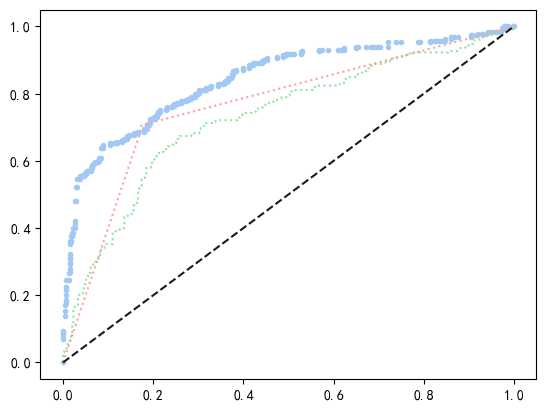

In [233]:
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt


train_data = datasets["titanic_train"]
test_data = datasets["titanic_predict"]

# 使用平均年龄来填充年龄中的nan值
train_data["Age"].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

# 使用票价的均值来填充票价中的nan值
train_data['Fare'].fillna(train_data["Fare"].mean(), inplace=True)
test_data['Fare'].fillna(test_data["Fare"].mean(), inplace=True)

train_data['Embarked'].fillna("S", inplace=True)
test_data['Embarked'].fillna("S", inplace=True)

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train_data[features]
y = train_data['Survived']
test_features = test_data[features]

one_hot_columns = ["Sex", "Embarked"]
one_hot_df = train_features[one_hot_columns]
train_features = train_features.drop(one_hot_columns, axis=1)
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(one_hot_df)
feature_name = ohe.get_feature_names_out(one_hot_df.columns)
part_df1 = pd.DataFrame(ohe.transform(one_hot_df).toarray(), columns=feature_name)
X = pd.merge(left=part_df1, right=train_features, right_index=True, left_index=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=10)
dt = DecisionTreeClassifier()
scores_sgd = cross_val_predict(sgd, X_train, y_train, cv=3, n_jobs=6, method="decision_function")
scores_rf = cross_val_predict(rf, X_train, y_train, cv=3, n_jobs=6, method="predict_proba")
scores_dt = cross_val_predict(dt, X_train, y_train, cv=3, n_jobs=6, method="predict_proba")

y_scores_rf = scores_rf[:, 1]
y_scores_dt = scores_dt[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_scores_rf)
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train, scores_sgd)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train, y_scores_dt)

plt.plot(fpr_rf, tpr_rf, 'b.')
plt.plot(fpr_sgd, tpr_sgd, 'g:')
plt.plot(fpr_dt, tpr_dt, 'r:')
plt.plot([0, 1], [0, 1], 'k--')